In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("Resources/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [2]:
application_df = application_df.drop(["EIN"], axis=1)
application_df.head()

,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [3]:
application_df = application_df.drop(["STATUS", "SPECIAL_CONSIDERATIONS"], axis=1)
application_df.head()

,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,INCOME_AMT,ASK_AMT,IS_SUCCESSFUL
0,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,0,5000,1
1,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1-9999,108590,1
2,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,0,5000,0
3,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,10000-24999,6692,1
4,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,100000-499999,142590,1


In [4]:
# Determine the number of unique values in each column.
application_df.nunique()

NAME                19568
APPLICATION_TYPE       17
AFFILIATION             6
CLASSIFICATION         71
USE_CASE                5
ORGANIZATION            4
INCOME_AMT              9
ASK_AMT              8747
IS_SUCCESSFUL           2
dtype: int64

In [5]:
# Look at NAME value counts for binning
per_name_counts = application_df["NAME"].value_counts()
print(per_name_counts)

PARENT BOOSTER USA INC                                                  1260
TOPS CLUB INC                                                            765
UNITED STATES BOWLING CONGRESS INC                                       700
WASHINGTON STATE UNIVERSITY                                              492
AMATEUR ATHLETIC UNION OF THE UNITED STATES INC                          408
                                                                        ... 
ST LOUIS SLAM WOMENS FOOTBALL                                              1
AIESEC ALUMNI IBEROAMERICA CORP                                            1
WEALLBLEEDRED ORG INC                                                      1
AMERICAN SOCIETY FOR STANDARDS IN MEDIUMSHIP & PSYCHICAL INVESTIGATI       1
WATERHOUSE CHARITABLE TR                                                   1
Name: NAME, Length: 19568, dtype: int64


<AxesSubplot:ylabel='Density'>

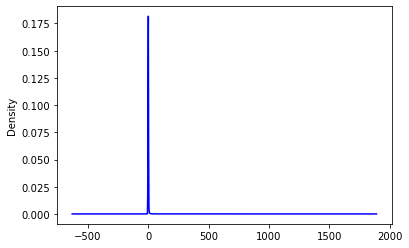

In [6]:
import matplotlib.pyplot as plt
# Visualize the value counts of NAME
per_name_counts.plot.density(color='blue')

In [7]:
# Determine which values to replace if counts are less than 50?
replace_application = list(per_name_counts[per_name_counts < 2].index)

# Replace in dataframe
for app in replace_application:
    application_df.NAME = application_df.NAME.replace(app,"Other")
    
# Check to make sure binning was successful
application_df.NAME.value_counts()

Other                                                                 18776
PARENT BOOSTER USA INC                                                 1260
TOPS CLUB INC                                                           765
UNITED STATES BOWLING CONGRESS INC                                      700
WASHINGTON STATE UNIVERSITY                                             492
                                                                      ...  
WASHINGTON EXPLORER SEARCH AND RESCUE                                     2
INTERNATIONAL ALLIANCE THEATRICAL STAGE EMPLOYEES & MOVING PICTURE        2
BIRTH NETWORK                                                             2
NATIONAL ASSOCIATON OF CORPORATE DIRECTORS                                2
NATIONAL SOCIETY COLONIAL DAMES XVII CENTURY                              2
Name: NAME, Length: 793, dtype: int64

In [8]:
# Look at APPLICATION_TYPE value counts for binning
per_app_type_counts = application_df["APPLICATION_TYPE"].value_counts()
print(per_app_type_counts)

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64


<AxesSubplot:ylabel='Density'>

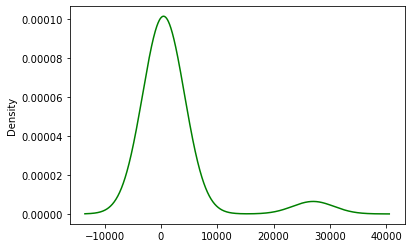

In [9]:
import matplotlib.pyplot as plt
# Visualize the value counts of APPLICATION_TYPE
per_app_type_counts.plot.density(color='green')

In [10]:
# Determine which values to replace if counts are less than ...?
replace_application = list(per_app_type_counts[per_app_type_counts < 200].index)

# Replace in dataframe
for app in replace_application:
    application_df.APPLICATION_TYPE = application_df.APPLICATION_TYPE.replace(app,"Other")
    
# Check to make sure binning was successful
application_df.APPLICATION_TYPE.value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [11]:
# Look at CLASSIFICATION value counts for binning
per_class_counts = application_df["CLASSIFICATION"].value_counts()
print(per_class_counts)

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64


<AxesSubplot:ylabel='Density'>

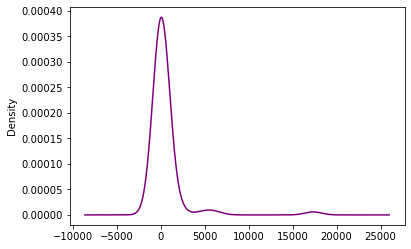

In [12]:
# Visualize the value counts of CLASSIFICATION
per_class_counts.plot.density(color='purple')

In [13]:
# Determine which values to replace if counts are less than ..?
replace_class = list(per_class_counts[per_class_counts < 1000].index)

# Replace in dataframe
for cls in replace_class:
    application_df.CLASSIFICATION = application_df.CLASSIFICATION.replace(cls,"Other")
    
# Check to make sure binning was successful
application_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [14]:
# Generate our categorical variable lists
application_cat = application_df.dtypes[application_df.dtypes =='object'].index.tolist()
application_cat

['NAME',
 'APPLICATION_TYPE',
 'AFFILIATION',
 'CLASSIFICATION',
 'USE_CASE',
 'ORGANIZATION',
 'INCOME_AMT']

In [15]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(application_df[application_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(application_cat)
encode_df.head()

,NAME_4-H CLUBS & AFFILIATED 4-H ORGANIZATIONS,NAME_AACE INTERNATIONAL,NAME_ACADEMY OF GENERAL DENTISTRY,NAME_ACADEMY OF MANAGED CARE PHARMACY,NAME_ACE MENTOR PROGRAM OF AMERICA INC,NAME_ACTIVE 20-30 UNITED STATES AND CANADA,NAME_ACTS MINISTRY,NAME_ACTS MISSIONS,NAME_AFRICAN-AMERICAN POSTAL LEAGUE UNITED FOR SUCCESS A-PLUS,NAME_AGENTS ASSOCIATION,...,ORGANIZATION_Trust,INCOME_AMT_0,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [16]:
# Merge one-hot encoded features and drop the originals
application_df = application_df.merge(encode_df, left_index=True, right_index=True).drop(application_cat,1)
application_df.head()

C:\Users\kimbe\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


,ASK_AMT,IS_SUCCESSFUL,NAME_4-H CLUBS & AFFILIATED 4-H ORGANIZATIONS,NAME_AACE INTERNATIONAL,NAME_ACADEMY OF GENERAL DENTISTRY,NAME_ACADEMY OF MANAGED CARE PHARMACY,NAME_ACE MENTOR PROGRAM OF AMERICA INC,NAME_ACTIVE 20-30 UNITED STATES AND CANADA,NAME_ACTS MINISTRY,NAME_ACTS MISSIONS,...,ORGANIZATION_Trust,INCOME_AMT_0,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M
0,5000,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,108590,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,5000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,6692,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,142590,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [17]:
# Split our preprocessed data into our features and target arrays
X=application_df.drop(["IS_SUCCESSFUL"],1).values
y=application_df["IS_SUCCESSFUL"].values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X,y)

C:\Users\kimbe\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


In [18]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [19]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 120
hidden_nodes_layer2 = 60
hidden_nodes_layer3 = 10

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="sigmoid"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 120)               100080    
                                                                 
 dense_1 (Dense)             (None, 60)                7260      
                                                                 
 dense_2 (Dense)             (None, 10)                610       
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 107,961
Trainable params: 107,961
Non-trainable params: 0
_________________________________________________________________


In [20]:
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("optimized_checkpoints/",exist_ok=True)
checkpoint_path = "optimized_checkpoints/weights.{epoch:02d}.hdf5"

In [21]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [22]:
# Create a callback that saves the model's weights every epoch
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq='epoch')

In [23]:
# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=200, callbacks=[cp_callback])

Epoch 1/200
769/804 [===========================>..] - ETA: 0s - loss: 0.4763 - accuracy: 0.7799
Epoch 1: saving model to optimized_checkpoints\weights.01.hdf5
804/804 [==============================] - 1s 821us/step - loss: 0.4747 - accuracy: 0.7810
Epoch 2/200
741/804 [==========================>...] - ETA: 0s - loss: 0.4268 - accuracy: 0.8034
Epoch 2: saving model to optimized_checkpoints\weights.02.hdf5
804/804 [==============================] - 1s 833us/step - loss: 0.4260 - accuracy: 0.8033
Epoch 3/200
752/804 [===========================>..] - ETA: 0s - loss: 0.4169 - accuracy: 0.8066
Epoch 3: saving model to optimized_checkpoints\weights.03.hdf5
804/804 [==============================] - 1s 826us/step - loss: 0.4166 - accuracy: 0.8066
Epoch 4/200
801/804 [============================>.] - ETA: 0s - loss: 0.4126 - accuracy: 0.8055
Epoch 4: saving model to optimized_checkpoints\weights.04.hdf5
804/804 [==============================] - 1s 841us/step - loss: 0.4126 - accuracy: 0.8

804/804 [==============================] - 1s 786us/step - loss: 0.3930 - accuracy: 0.8142
Epoch 34/200
789/804 [============================>.] - ETA: 0s - loss: 0.3931 - accuracy: 0.8126
Epoch 34: saving model to optimized_checkpoints\weights.34.hdf5
804/804 [==============================] - 1s 787us/step - loss: 0.3926 - accuracy: 0.8131
Epoch 35/200
793/804 [============================>.] - ETA: 0s - loss: 0.3920 - accuracy: 0.8147
Epoch 35: saving model to optimized_checkpoints\weights.35.hdf5
804/804 [==============================] - 1s 783us/step - loss: 0.3919 - accuracy: 0.8148
Epoch 36/200
793/804 [============================>.] - ETA: 0s - loss: 0.3919 - accuracy: 0.8144
Epoch 36: saving model to optimized_checkpoints\weights.36.hdf5
804/804 [==============================] - 1s 782us/step - loss: 0.3917 - accuracy: 0.8143
Epoch 37/200
785/804 [============================>.] - ETA: 0s - loss: 0.3900 - accuracy: 0.8159
Epoch 37: saving model to optimized_checkpoints\weig

788/804 [============================>.] - ETA: 0s - loss: 0.3902 - accuracy: 0.8157
Epoch 66: saving model to optimized_checkpoints\weights.66.hdf5
804/804 [==============================] - 1s 787us/step - loss: 0.3894 - accuracy: 0.8163
Epoch 67/200
788/804 [============================>.] - ETA: 0s - loss: 0.3887 - accuracy: 0.8161
Epoch 67: saving model to optimized_checkpoints\weights.67.hdf5
804/804 [==============================] - 1s 788us/step - loss: 0.3887 - accuracy: 0.8166
Epoch 68/200
786/804 [============================>.] - ETA: 0s - loss: 0.3884 - accuracy: 0.8164
Epoch 68: saving model to optimized_checkpoints\weights.68.hdf5
804/804 [==============================] - 1s 788us/step - loss: 0.3885 - accuracy: 0.8165
Epoch 69/200
788/804 [============================>.] - ETA: 0s - loss: 0.3896 - accuracy: 0.8155
Epoch 69: saving model to optimized_checkpoints\weights.69.hdf5
804/804 [==============================] - 1s 788us/step - loss: 0.3896 - accuracy: 0.8153
E

804/804 [==============================] - 1s 794us/step - loss: 0.3884 - accuracy: 0.8166
Epoch 99/200
788/804 [============================>.] - ETA: 0s - loss: 0.3868 - accuracy: 0.8166
Epoch 99: saving model to optimized_checkpoints\weights.99.hdf5
804/804 [==============================] - 1s 788us/step - loss: 0.3880 - accuracy: 0.8163
Epoch 100/200
775/804 [===========================>..] - ETA: 0s - loss: 0.3895 - accuracy: 0.8158
Epoch 100: saving model to optimized_checkpoints\weights.100.hdf5
804/804 [==============================] - 1s 801us/step - loss: 0.3889 - accuracy: 0.8165
Epoch 101/200
779/804 [============================>.] - ETA: 0s - loss: 0.3881 - accuracy: 0.8168
Epoch 101: saving model to optimized_checkpoints\weights.101.hdf5
804/804 [==============================] - 1s 798us/step - loss: 0.3885 - accuracy: 0.8166
Epoch 102/200
778/804 [============================>.] - ETA: 0s - loss: 0.3877 - accuracy: 0.8175
Epoch 102: saving model to optimized_checkpoi

Epoch 131/200
786/804 [============================>.] - ETA: 0s - loss: 0.3882 - accuracy: 0.8174
Epoch 131: saving model to optimized_checkpoints\weights.131.hdf5
804/804 [==============================] - 1s 790us/step - loss: 0.3878 - accuracy: 0.8175
Epoch 132/200
786/804 [============================>.] - ETA: 0s - loss: 0.3881 - accuracy: 0.8176
Epoch 132: saving model to optimized_checkpoints\weights.132.hdf5
804/804 [==============================] - 1s 788us/step - loss: 0.3888 - accuracy: 0.8169
Epoch 133/200
777/804 [===========================>..] - ETA: 0s - loss: 0.3878 - accuracy: 0.8181
Epoch 133: saving model to optimized_checkpoints\weights.133.hdf5
804/804 [==============================] - 1s 799us/step - loss: 0.3884 - accuracy: 0.8175
Epoch 134/200
786/804 [============================>.] - ETA: 0s - loss: 0.3881 - accuracy: 0.8178
Epoch 134: saving model to optimized_checkpoints\weights.134.hdf5
804/804 [==============================] - 1s 789us/step - loss: 0.

785/804 [============================>.] - ETA: 0s - loss: 0.3887 - accuracy: 0.8179
Epoch 163: saving model to optimized_checkpoints\weights.163.hdf5
804/804 [==============================] - 1s 791us/step - loss: 0.3890 - accuracy: 0.8177
Epoch 164/200
777/804 [===========================>..] - ETA: 0s - loss: 0.3886 - accuracy: 0.8178
Epoch 164: saving model to optimized_checkpoints\weights.164.hdf5
804/804 [==============================] - 1s 800us/step - loss: 0.3891 - accuracy: 0.8177
Epoch 165/200
786/804 [============================>.] - ETA: 0s - loss: 0.3910 - accuracy: 0.8168
Epoch 165: saving model to optimized_checkpoints\weights.165.hdf5
804/804 [==============================] - 1s 791us/step - loss: 0.3902 - accuracy: 0.8174
Epoch 166/200
787/804 [============================>.] - ETA: 0s - loss: 0.3900 - accuracy: 0.8174
Epoch 166: saving model to optimized_checkpoints\weights.166.hdf5
804/804 [==============================] - 1s 789us/step - loss: 0.3894 - accurac

773/804 [===========================>..] - ETA: 0s - loss: 0.3889 - accuracy: 0.8180
Epoch 195: saving model to optimized_checkpoints\weights.195.hdf5
804/804 [==============================] - 1s 801us/step - loss: 0.3888 - accuracy: 0.8178
Epoch 196/200
778/804 [============================>.] - ETA: 0s - loss: 0.3912 - accuracy: 0.8165
Epoch 196: saving model to optimized_checkpoints\weights.196.hdf5
804/804 [==============================] - 1s 797us/step - loss: 0.3907 - accuracy: 0.8168
Epoch 197/200
781/804 [============================>.] - ETA: 0s - loss: 0.3902 - accuracy: 0.8172
Epoch 197: saving model to optimized_checkpoints\weights.197.hdf5
804/804 [==============================] - 1s 794us/step - loss: 0.3907 - accuracy: 0.8170
Epoch 198/200
777/804 [===========================>..] - ETA: 0s - loss: 0.3888 - accuracy: 0.8180
Epoch 198: saving model to optimized_checkpoints\weights.198.hdf5
804/804 [==============================] - 1s 798us/step - loss: 0.3890 - accurac

In [24]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.4552 - accuracy: 0.8020 - 224ms/epoch - 838us/step
Loss: 0.4552342891693115, Accuracy: 0.8019825220108032


In [25]:
# Export our model to HDF5 file
nn.save("AlphabetSoupCharity_Optimization.h5")